In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [8]:
import pandas as pd

data = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

df = pd.DataFrame({
    'feature': data,
    'label': passed
})

print(f"Dataset Shape: {df.shape}")
print(df.head())


Dataset Shape: (20, 2)
   feature  label
0     0.50      0
1     0.75      0
2     1.00      0
3     1.25      0
4     1.50      0


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(data).reshape(-1, 1) 
y = np.array(passed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")


Training features shape: (16, 1)
Training labels shape: (16,)


Model Intercept (b0): -4.0787
Model Coefficient (b1): 1.5050
Equation: P(Pass) = 1 / (1 + e^(-(-4.08 + 1.51*x)))
Training Accuracy: 80.00%


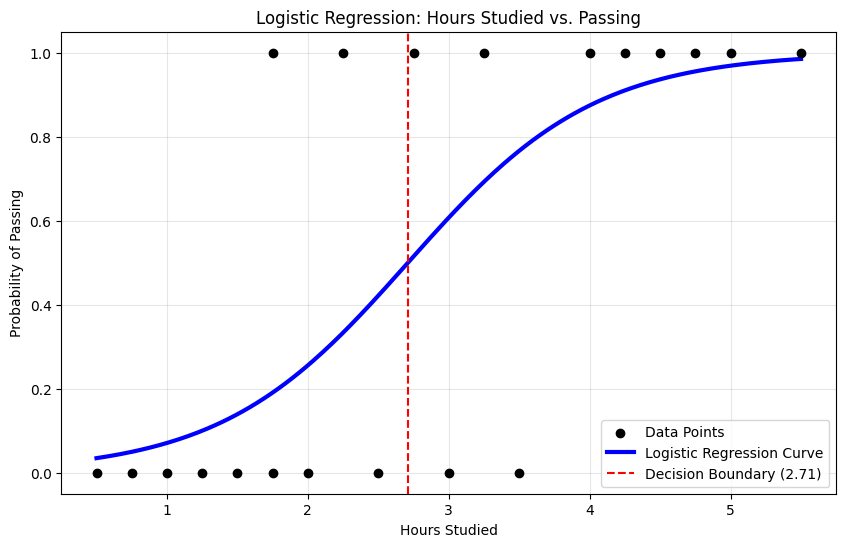

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

hours_studied = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
                 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 
          1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

# Scikit-learn requires the feature matrix X to be 2D (samples, features)
X = np.array(hours_studied).reshape(-1, 1)
y = np.array(passed)

# 2. Initialize and Train the Model
# C=1e5 is a high inverse regularization strength to reduce regularization 
# (optional, but helps with small datasets to fit the data closer)
log_reg = LogisticRegression(C=1e5) 
log_reg.fit(X, y)

# 3. Inspect Model Parameters
b0 = log_reg.intercept_[0]
b1 = log_reg.coef_[0][0]

print(f"Model Intercept (b0): {b0:.4f}")
print(f"Model Coefficient (b1): {b1:.4f}")
print(f"Equation: P(Pass) = 1 / (1 + e^(-({b0:.2f} + {b1:.2f}*x)))")

# 4. Evaluate the Model
# Predict class labels (0 or 1) for the training data
y_pred = log_reg.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='black', zorder=20, label='Data Points')

X_test = np.linspace(min(hours_studied), max(hours_studied), 300).reshape(-1, 1)

y_prob = log_reg.predict_proba(X_test)[:, 1]

plt.plot(X_test, y_prob, color='blue', linewidth=3, label='Logistic Regression Curve')

decision_boundary = -b0 / b1
plt.axvline(decision_boundary, color='red', linestyle='--', label=f'Decision Boundary ({decision_boundary:.2f})')

plt.ylabel('Probability of Passing')
plt.xlabel('Hours Studied')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Logistic Regression: Hours Studied vs. Passing')
plt.show()
